https://keras.io/examples/nlp/pretrained_word_embeddings/

In [70]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [73]:
from Models import *
#Importing: BertEncodingWords, W2VModel

# How Similar are BERT and Word2Vec?

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


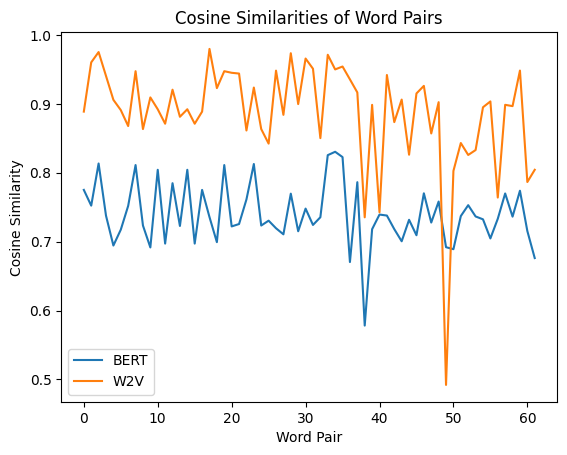

In [141]:
bertWords = BertEncodingWords()
W2V_768 = W2VModel(768)

BERT_similarities, W2V_similarities = [], []

for pair in word_pairs:
	BERT_similarities.append(1-cosine(bertWords.getWordVector(pair[0]), bertWords.getWordVector(pair[1])))
	W2V_similarities.append(1-cosine(W2V_768.getvector(pair[0]), W2V.getvector(pair[1])))

plt.plot(BERT_similarities, label = "BERT")
plt.plot(W2V_similarities, label = "W2V")
plt.title("Cosine Similarities of Word Pairs")
plt.xlabel("Word Pair")
plt.ylabel("Cosine Similarity")
plt.legend()
plt.show()

# Rotations

In [84]:
def RotateWordVector(input_word_vector):
	rotated_word_vector = []
	for comaprison_word in word_list:
		rotated_word_vector.append(1-cosine(input_word_vector, W2V.getvector(comaprison_word)))
	return rotated_word_vector

W2V = W2VModel(768)
rotated_words = dict()
for word in word_list:
	rotated_word_vector = []
	rotated_word_vector = RotateWordVector(W2V.getvector(word))
	normalized_rotated_vector = np.array(rotated_word_vector)
	scaled_normalized_rotated_vector = np.interp(normalized_rotated_vector, (normalized_rotated_vector.min(), normalized_rotated_vector.max()), (-1, +1))
	rotated_words.update({str(word): scaled_normalized_rotated_vector})

word = 'board'
comaprison_word = 'market'
1-cosine(W2V.getvector(word), W2V.getvector(comaprison_word)), 1-cosine(rotated_words[word], rotated_words[comaprison_word]), len(rotated_words['board']),len(rotated_words['market']) 

In [86]:
def evaluateSimilaritiesOfMethods():
	res = dict()
	word_pairs = GetWordPairs()
	for idx, word in enumerate(word_pairs):
		res.update({str(word[0] + " "+ word[1]):1 - cosine(rotated_words[word[0]], rotated_words[word[1]])})
	return res

rotated_similatities = evaluateSimilaritiesOfMethods()
#rotated_similatities

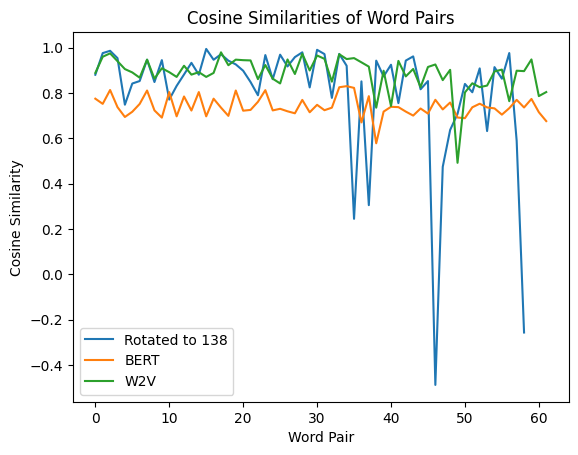

In [142]:
plt.plot(rotated_similatities.values(), label='Rotated to '+str(len(word_list)))
plt.plot(BERT_similarities, label = "BERT")
plt.plot(W2V_similarities, label = "W2V")
plt.title("Cosine Similarities of Word Pairs")
plt.xlabel("Word Pair")
plt.ylabel("Cosine Similarity")
plt.legend()
plt.show()

# Single Value Decomposition

https://en.wikipedia.org/wiki/Singular_value_decomposition#:~:text=equivalent%20to%20zero.-,Low%2Drank%20matrix%20approximation,-%5Bedit%5D

In [91]:
def PerformSVD(A, N):
    # Perform SVD on the input vector
    U, D, Vt = np.linalg.svd(A)
    print(U.shape, D.shape, Vt.shape)
    # Select the first N columns of the U matrix
    U_reduced = U[:, :N]
    # Multiply the reduced U matrix with the S matrix
    A_reduced = np.dot(U_reduced, np.diag(D))
    return A_reduced

PerformSVD(np.array([[2,3, 9, 9, 9, 34,5, 4,5,6,44,5,6,4,3,9]]),1)

(1, 1) (1,) (16, 16)


array([[-60.14149982]])

# PCA

In [103]:
from sklearn.decomposition import PCA

def DimReduceByPCA(input_array, new_dims):
	pca = PCA(n_components = new_dims)
	pca.fit(input_array)
	data_pca = pca.transform(input_array)
	return data_pca
	

bertVectors = np.array([bertWords.getWordVector(vec) for vec in word_list])
PCA_BERT_vec = DimReduceByPCA(bertVectors, 138)
assert(np.array(bertVectors).shape[0] == PCA_BERT_vec.shape[0])

dict_PCA_BERT_vec = {word_list[i]: row for i, row in enumerate(PCA_BERT_vec)}

assert(np.array(bertVectors).shape[0] == PCA_BERT_vec.shape[0])

PCA_BERT_vec=[]
for pair in word_pairs:
	reduced_BERT_vec.append(1-cosine(dict_PCA_BERT_vec[pair[0]],dict_PCA_BERT_vec[pair[1]]))


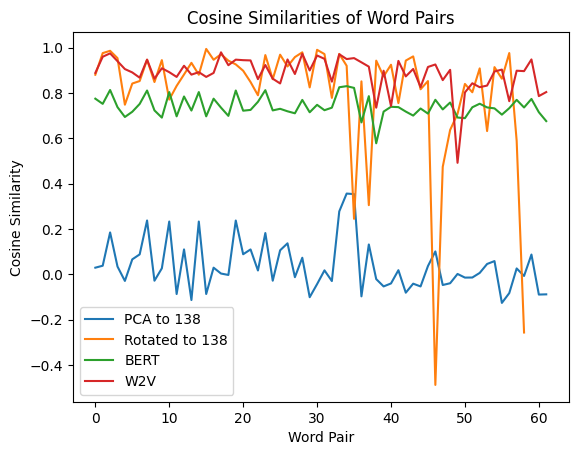

In [145]:
plt.plot(reduced_BERT_vec, label = 'PCA to '+str(138))
plt.plot(rotated_similatities.values(), label='Rotated to '+str(len(word_list)))
plt.plot(BERT_similarities, label = "BERT")
plt.plot(W2V_similarities, label = "W2V")
plt.title("Cosine Similarities of Word Pairs")
plt.xlabel("Word Pair")
plt.ylabel("Cosine Similarity")
plt.legend()
plt.show()

# Autoencoder (Symetric & Deep)

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim = 15 
input_img = Input(shape=(768,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded1 = Dense(768, activation='sigmoid')(encoded)
decoded2 = Dense(384, activation='sigmoid')(encoded)
decoded3 = Dense(96, activation='sigmoid')(encoded)
decoded4 = Dense(20, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, [decoded1, decoded2, decoded3, decoded4])

# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
x_train = bertVectors
x_train.shape

(143, 768)

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
print(x_train.shape)

(143, 768)


In [ ]:
x_test.shape[1:]

(784,)

# Evaluation: Similarities in Methods

In [103]:
BERT = BertEncodingWords(word_list)
W2V = W2VModel(768)

BERT_dots = dict()
W2V_dots = dict()
ROTATED_dots = dict()
for pair in word_pairs:
	print(pair)
	#Try accept as some words do not work in the W2V eg:W2V.wv['plan'] -> Error
	W2V_dots.update({pair[0]+" "+pair[1]:1 - cosine(W2V.getvector(pair[0]), W2V.getvector(pair[1]))})
	ROTATED_dots.update({pair[0]+" "+pair[1]:1 - cosine(rotated_words[pair[0]], rotated_words[pair[1]])})
	BERT_dots.update({pair[0]+" "+pair[1]:1 - cosine(BERT.getWordVector(pair[0]), BERT.getWordVector(pair[1]))})
	#print(pair[0], pair[1], len(BERT_dots), len(W2V_dots), np.round(W2V_dots[pair[0]+" "+pair[1]], 2), np.round(BERT_dots[pair[0]+" "+pair[1]], 2))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['party', 'government']
['official', 'leader']
['state', 'government']
['control', 'intervention']
['tax', 'interest']
['charge', 'rate']
['party', 'opposition']
['leader', 'member']
['tax', 'family']
['credit', 'allowance']
['state', 'county']
['benefit', 'council']
['state', 'town']
['control', 'council']
['state', 'county']
['benefit', 'council']
['government', 'party']
['intervention', 'leader']
['market', 'board']
['leader', 'member']
['labour', 'housing']
['cost', 'benefit']
['management', 'computer']
['structure', 'system']
['family', 'tax']
['allowance', 'rate']
['tax', 'wage']
['credit', 'increase']
['management', 'planning']
['skill', 'committee']
['education', 'service']
['authority', 'department']
['assistant', 'company']
['manager', 'director']
['kitchen', 'bedroom']
['door', 'window']
['intelligence', 'bus']
['service', 'company']
['tax', 'datum']
['charge', 'system']
['world', 'management']
['economy', 'structure']
['company', 'tax']
['director', 'credit']
['league', 'fa

In [104]:
BERT_dots

{'party government': 0.7750695943832397,
 'official leader': 0.7522398829460144,
 'state government': 0.8133704662322998,
 'control intervention': 0.7376946806907654,
 'tax interest': 0.6943225264549255,
 'charge rate': 0.717332661151886,
 'party opposition': 0.7518858313560486,
 'leader member': 0.8111140727996826,
 'tax family': 0.7233424186706543,
 'credit allowance': 0.691547691822052,
 'state county': 0.8042483925819397,
 'benefit council': 0.6971415281295776,
 'state town': 0.7847762107849121,
 'control council': 0.7227463722229004,
 'government party': 0.7750695943832397,
 'intervention leader': 0.735630452632904,
 'market board': 0.6992111802101135,
 'labour housing': 0.722057580947876,
 'cost benefit': 0.7255298495292664,
 'management computer': 0.7612450122833252,
 'structure system': 0.8126272559165955,
 'family tax': 0.7233424186706543,
 'allowance rate': 0.7304175496101379,
 'tax wage': 0.7193946838378906,
 'credit increase': 0.7105820178985596,
 'management planning': 0.7

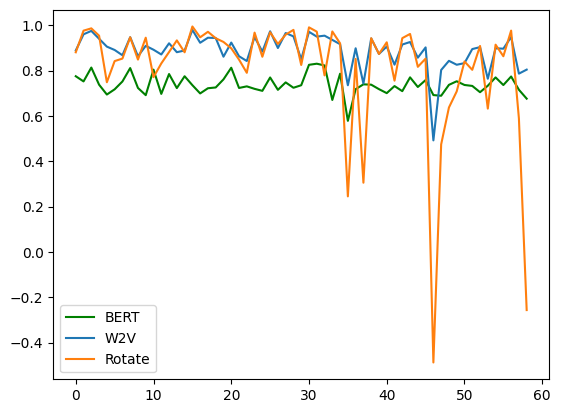

In [106]:
fig, ax = plt.subplots()

plt.plot(BERT_dots.values(), color='g', label = 'BERT')
plt.plot(W2V_dots.values(), label = 'W2V')
plt.plot(ROTATED_dots.values(), label = 'Rotate')
plt.legend()
plt.show()